# Breast Cancer Diagnostic
## The goal of this project is to build a model able to predict the diagnosis of breast cancer tissues as malignant or benign. 

- Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. 

- Class distribution: 357 benign, 212 malignant. More info about this dataset here

In [261]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, RobustScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import (roc_auc_score, confusion_matrix, recall_score, precision_score, RocCurveDisplay, 
                             accuracy_score, plot_confusion_matrix, auc, classification_report)
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import plotly.express as px

In [195]:
# import data
X= pd.read_csv("X.csv")
y=pd.read_csv("y.csv")
y=y.values.ravel()

### ALL

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)

## Logistic Regression

In [109]:
lr= LogisticRegression(random_state=random, max_iter=5000)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.9472361809045227
Test Accuracy:  0.9649122807017544
Training ROC_AUC:  0.9389639093285894
Test ROC_AUC:  0.9623015873015873


In [154]:
X_test.shape

(171, 17)

In [264]:
lr= LogisticRegression(random_state=random, max_iter=5000, penalty='l1', solver='liblinear')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Accuracy: ", lr.score(X_train, y_train))
print("Test Accuracy: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Accuracy:  0.9547738693467337
Test Accuracy:  0.9649122807017544
Training ROC_AUC:  0.9476833508530768
Test ROC_AUC:  0.958994708994709


## Tuning

In [119]:
# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=1000, max_iter=5000, random_state=42, solver='newton-cg')


0.9954910052910052

In [265]:
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning
simplefilter("ignore", category=ConvergenceWarning)
import warnings 
warnings.filterwarnings("ignore")

# define models and parameters
# define grid search
param_grid={'solver': ['newton-cg', 'lbfgs', 'liblinear'], 
            'penalty':['l2'],
            'C':[900, 1000,2000,3000,3100],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=3100, max_iter=5000, random_state=42)


0.9925222222222223

In [260]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
13,1.914273,0.242072,0.004050,0.000724,3100,5000,l2,lbfgs,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.986667,...,0.981333,0.986667,0.992000,0.989333,1.000000,0.962857,1.000000,0.992522,0.010984,1
10,2.338219,0.576853,0.004644,0.001117,3000,5000,l2,lbfgs,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.986667,...,0.978667,0.986667,0.992000,0.989333,1.000000,0.960000,1.000000,0.992427,0.011250,2
7,2.899071,0.807870,0.005834,0.002056,2000,5000,l2,lbfgs,"{'C': 2000, 'max_iter': 5000, 'penalty': 'l2',...",0.986667,...,0.978667,0.984000,0.992000,0.992000,1.000000,0.962857,1.000000,0.992351,0.011080,3
4,2.192843,0.636777,0.004611,0.001008,1000,5000,l2,lbfgs,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",0.984000,...,0.978667,0.986667,0.992000,0.994667,1.000000,0.954286,1.000000,0.992325,0.011998,4
1,1.718180,0.404737,0.003419,0.000823,900,5000,l2,lbfgs,"{'C': 900, 'max_iter': 5000, 'penalty': 'l2', ...",0.986667,...,0.978667,0.986667,0.992000,0.989333,1.000000,0.954286,1.000000,0.992148,0.011922,5
0,0.188343,0.023540,0.003330,0.000679,900,5000,l2,newton-cg,"{'C': 900, 'max_iter': 5000, 'penalty': 'l2', ...",0.984000,...,0.978667,0.989333,0.994667,0.994667,1.000000,0.951429,1.000000,0.991952,0.012581,6
14,0.013549,0.002908,0.004093,0.000754,3100,5000,l2,liblinear,"{'C': 3100, 'max_iter': 5000, 'penalty': 'l2',...",0.986667,...,0.981333,0.986667,1.000000,0.994667,1.000000,0.951429,0.997222,0.991793,0.014042,7
3,0.214268,0.027299,0.003760,0.000591,1000,5000,l2,newton-cg,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",0.981333,...,0.978667,0.989333,0.994667,0.994667,1.000000,0.951429,1.000000,0.991686,0.012792,8
5,0.015502,0.003271,0.005058,0.001129,1000,5000,l2,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l2',...",0.989333,...,0.978667,0.992000,0.994667,0.992000,0.997333,0.951429,0.997222,0.991438,0.014015,9
11,0.014167,0.002261,0.004302,0.000849,3000,5000,l2,liblinear,"{'C': 3000, 'max_iter': 5000, 'penalty': 'l2',...",0.976000,...,0.981333,0.986667,0.997333,0.992000,1.000000,0.951429,0.997222,0.991438,0.014234,9


##### Tuned Model

In [281]:
lr= LogisticRegression(C=3100, max_iter=5000, random_state=42, solver='lbfgs')
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9849246231155779
0.9824561403508771
Training ROC_AUC:  0.9839087895204981
Test ROC_AUC:  0.9828042328042329


(0.0, 1.0)

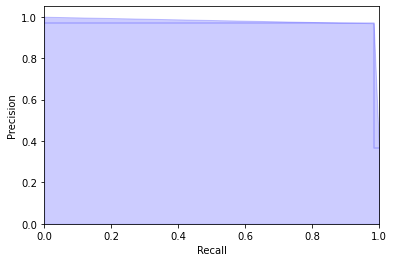

In [283]:
from sklearn.metrics import precision_recall_curve
precision, recall, thresholds = precision_recall_curve(y_test,y_test_pred)
plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])

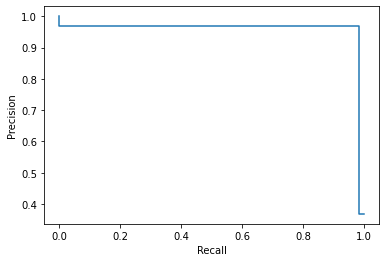

In [284]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

prec, recall, _ = precision_recall_curve(y_test, y_test_pred, pos_label=lr.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

Accuracy : 98.25
precision : 96.88
recall : 98.41


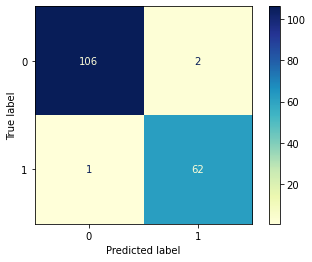

In [253]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [263]:
target_names = ['Benign', 'Malignant']
print(classification_report(y_test, y_test_pred, target_names=target_names))

              precision    recall  f1-score   support

      Benign       0.99      0.98      0.99       108
   Malignant       0.97      0.98      0.98        63

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



Text(0.5, 0, 'False Positive Rate')

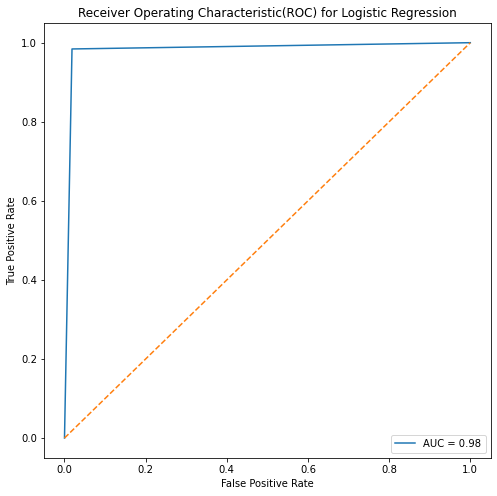

In [279]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Logistic Regression")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

In [127]:
lr= LogisticRegression(C=2000, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9773869346733668
Test Score:  0.9766081871345029
Training ROC_AUC:  0.9738416754265383
Test ROC_AUC:  0.974867724867725


### LASSO Tuning

In [128]:
# define models and parameters
# define grid search
param_grid={'solver': ['liblinear'], 
            'penalty':['l1'],
            'C':[100, 10, 1.0, 0.1, 0.01, 1000],
           'max_iter': [5000]}

#why? keep the balance in the splits
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(lr, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

LogisticRegression(C=100, max_iter=5000, penalty='l1', random_state=42,
                   solver='liblinear')


0.9931000000000002

In [130]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,param_penalty,param_solver,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
0,0.050030,0.068693,0.002605,0.000632,100,5000,l1,liblinear,"{'C': 100, 'max_iter': 5000, 'penalty': 'l1', ...",0.986667,...,0.989333,0.960000,0.986667,1.000000,1.000000,0.980000,1.000000,0.993100,0.009812,1
1,0.041008,0.034471,0.002664,0.000570,10,5000,l1,liblinear,"{'C': 10, 'max_iter': 5000, 'penalty': 'l1', '...",0.992000,...,0.978667,0.997333,0.997333,0.989333,1.000000,0.968571,1.000000,0.991834,0.009663,2
5,0.018947,0.009171,0.002446,0.000470,1000,5000,l1,liblinear,"{'C': 1000, 'max_iter': 5000, 'penalty': 'l1',...",0.936000,...,0.992000,0.917333,0.984000,0.997333,1.000000,0.982857,1.000000,0.988836,0.020482,3
2,0.021609,0.006380,0.002525,0.000500,1,5000,l1,liblinear,"{'C': 1.0, 'max_iter': 5000, 'penalty': 'l1', ...",0.944000,...,0.973333,0.994667,0.989333,0.976000,1.000000,0.954286,0.994444,0.986887,0.016355,4
3,0.008588,0.001987,0.002306,0.000480,0.1,5000,l1,liblinear,"{'C': 0.1, 'max_iter': 5000, 'penalty': 'l1', ...",0.901333,...,0.960000,0.981333,0.984000,0.973333,1.000000,0.888571,0.988889,0.973270,0.029094,5
4,0.005021,0.000745,0.002351,0.000531,0.01,5000,l1,liblinear,"{'C': 0.01, 'max_iter': 5000, 'penalty': 'l1',...",0.872000,...,0.954667,0.928000,0.946667,0.968000,0.989333,0.814286,0.980556,0.946587,0.041572,6


##### Tuned Model

In [129]:
lr= LogisticRegression(penalty='l1', C=100, solver='liblinear', random_state=random)
lr= lr.fit(X_train, y_train)
y_train_pred=lr.predict(X_train)
y_test_pred=lr.predict(X_test)
print("Training Score: ",lr.score(X_train, y_train))
print("Test Score: ", lr.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

Training Score:  0.9849246231155779
Test Score:  0.9707602339181286
Training ROC_AUC:  0.9825611169510257
Test ROC_AUC:  0.966931216931217


Accuracy : 97.08
precision : 96.77
recall : 95.24


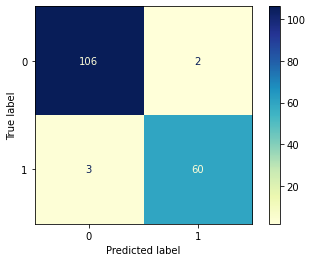

In [131]:
print('Accuracy :', round(accuracy_score(y_test,y_test_pred)*100,2))
print('precision :', round(precision_score(y_test,y_test_pred)*100,2))
print('recall :', round(recall_score(y_test,y_test_pred)*100,2))
plot_confusion_matrix(lr, X_test, y_test, cmap='YlGnBu')
plt.show()

In [280]:
# last 5 are what was predicted incorrectly
residuals = lr.predict_proba(X_test)[:,1] - y_test
sortIdx=np.argsort(np.abs(residuals))
residDF=X_test.iloc[sortIdx].copy()
residDF["resid"]=residuals[sortIdx]
residDF['y_true']=y_test[sortIdx]
residDF['y_pred']=y_test_pred[sortIdx]
# print(residDF.std())
outliers=residDF.tail(15)
outliers
# outliers.std()
#sns.regplot(x = residuals, y = y_test_pred, scatter = True, color = 'red');

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,resid,y_true,y_pred
208,13.110,22.54,87.02,529.4,0.10020,0.14830,0.08705,0.05102,0.1850,0.07310,...,639.3,0.13490,0.4402,0.3162,0.11260,0.4128,0.10760,0.070233,0,0
248,10.650,25.22,68.01,347.0,0.09657,0.07234,0.02379,0.01615,0.1897,0.06329,...,455.7,0.14990,0.1398,0.1125,0.06136,0.3409,0.08147,0.100717,0,0
228,12.620,23.97,81.35,496.4,0.07903,0.07529,0.05438,0.02036,0.1514,0.06019,...,624.0,0.12270,0.3454,0.3911,0.11800,0.2826,0.09585,0.105235,0,0
396,13.510,18.89,88.10,558.1,0.10590,0.11470,0.08580,0.05381,0.1806,0.06079,...,675.2,0.14280,0.2570,0.3438,0.14530,0.2666,0.07686,0.156445,0,0
86,14.480,21.46,94.25,648.2,0.09444,0.09947,0.12040,0.04938,0.2075,0.05636,...,808.9,0.13060,0.1976,0.3349,0.12250,0.3020,0.06846,-0.158518,1,1
184,15.280,22.41,98.92,710.6,0.09057,0.10520,0.05375,0.03263,0.1727,0.06317,...,973.1,0.13010,0.3299,0.3630,0.12260,0.3175,0.09772,-0.164957,1,1
526,13.460,18.75,87.44,551.1,0.10750,0.11380,0.04201,0.03152,0.1723,0.06317,...,719.8,0.16240,0.3124,0.2654,0.14270,0.3518,0.08665,0.187995,0,0
204,12.470,18.60,81.09,481.9,0.09965,0.10580,0.08005,0.03821,0.1925,0.06373,...,677.9,0.14260,0.2378,0.2671,0.10150,0.3014,0.08750,0.192272,0,0
89,14.640,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,803.6,0.12770,0.3089,0.2604,0.13970,0.3151,0.08473,0.238715,0,0
255,13.960,17.05,91.43,602.4,0.10960,0.12790,0.09789,0.05246,0.1908,0.06130,...,826.0,0.15120,0.3262,0.3209,0.13740,0.3068,0.07957,-0.243303,1,1


In [155]:
residDF.groupby('y_true').mean()

,radius_worst,concave points_worst,texture_worst,texture_mean,smoothness_worst,compactness_worst,area_worst,area_se,concavity_mean,smoothness_mean,concave points_mean,compactness_se,compactness_mean,concavity_se,symmetry_worst,concavity_worst,symmetry_mean,resid,y_pred
y_true,,,,,,,,,,,,,,,,,,,
0,13.188380,0.073641,23.808611,18.094167,0.125902,0.183516,541.462963,20.851676,0.045052,0.093203,0.025749,0.021112,0.079677,0.024923,0.276775,0.166156,0.176876,0.034390,0.018519
1,21.436032,0.189681,29.965079,22.163333,0.147222,0.408268,1453.939683,72.096508,0.168397,0.104290,0.091669,0.033734,0.153177,0.041532,0.324095,0.477278,0.193902,-0.037147,0.952381


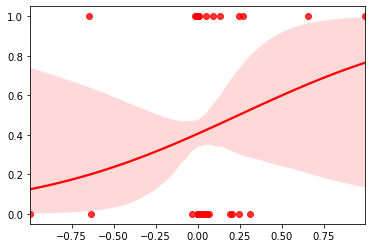

In [212]:
sns.regplot(x = residuals, y = y_test_pred, logistic=True, scatter = True, color = 'red');

In [ ]:
sns.residplot(x=resid, y=y, lowess=True, color="g")

## Naive Bayes

In [171]:
from sklearn.naive_bayes import GaussianNB
#normal data helped this
gnb = GaussianNB()
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9396984924623115
0.9415204678362573
Training ROC_AUC:  0.9302444678041024
Test ROC_AUC:  0.9338624338624338


#### Bernoulli

In [172]:
from sklearn.naive_bayes import BernoulliNB
clf = BernoulliNB()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.6256281407035176
0.631578947368421
Training RMSE:  0.6118593460073013
Test RMSE:  0.6069769786668839
Training ROC_AUC:  0.5
Test ROC_AUC:  0.5


### Tuning

In [173]:
param_grid= {'var_smoothing': np.logspace(0,-9, num=100)
        }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(gnb, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GaussianNB(var_smoothing=6.579332246575682e-09)


0.9859444444444444

var_smoothing is a stability calculation to widen (or smooth) the curve and therefore account for more samples that are further away from the distribution mean. In this case, np.logspace returns numbers spaced evenly on a log scale, starts from 0, ends at -9, and generates 100 samples.
from https://medium.com/analytics-vidhya/how-to-improve-naive-bayes-9fa698e14cba

In [174]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_var_smoothing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
90,0.003804,0.000895,0.003950,0.001065,6.57933e-09,{'var_smoothing': 6.579332246575682e-09},1.000000,1.0,0.994667,1.0,...,0.965333,1.0,0.968000,0.976000,1.0,0.980000,0.991667,0.985944,0.014089,1
89,0.003998,0.000769,0.003852,0.000994,8.11131e-09,{'var_smoothing': 8.111308307896856e-09},1.000000,1.0,0.994667,1.0,...,0.962667,1.0,0.965333,0.976000,1.0,0.974286,0.991667,0.985745,0.014453,2
88,0.004124,0.001468,0.003983,0.001201,1e-08,{'var_smoothing': 1e-08},1.000000,1.0,0.994667,1.0,...,0.962667,1.0,0.965333,0.981333,1.0,0.965714,0.991667,0.985548,0.014515,3
87,0.003006,0.000736,0.003167,0.001003,1.23285e-08,{'var_smoothing': 1.232846739442066e-08},1.000000,1.0,0.994667,1.0,...,0.960000,1.0,0.970667,0.984000,1.0,0.965714,0.991667,0.985360,0.014625,4
91,0.003565,0.000987,0.003766,0.000979,5.3367e-09,{'var_smoothing': 5.336699231206302e-09},1.000000,1.0,0.994667,1.0,...,0.965333,1.0,0.968000,0.961333,1.0,0.982857,0.988889,0.984919,0.015530,5
95,0.002805,0.000647,0.003042,0.000881,2.31013e-09,{'var_smoothing': 2.310129700083158e-09},1.000000,1.0,0.992000,1.0,...,0.962667,1.0,0.968000,0.965333,1.0,0.982857,0.991667,0.984893,0.016575,6
92,0.003786,0.001101,0.003832,0.000737,4.32876e-09,{'var_smoothing': 4.328761281083061e-09},1.000000,1.0,0.994667,1.0,...,0.962667,1.0,0.968000,0.964000,1.0,0.982857,0.988889,0.984700,0.016308,7
93,0.003035,0.000793,0.003081,0.000915,3.51119e-09,{'var_smoothing': 3.5111917342151273e-09},1.000000,1.0,0.994667,1.0,...,0.962667,1.0,0.968000,0.964000,1.0,0.982857,0.988889,0.984610,0.016389,8
94,0.002544,0.000491,0.002701,0.000690,2.84804e-09,{'var_smoothing': 2.848035868435805e-09},1.000000,1.0,0.992000,1.0,...,0.962667,1.0,0.968000,0.964000,1.0,0.982857,0.988889,0.984524,0.016663,9
86,0.003853,0.001012,0.003847,0.000809,1.51991e-08,{'var_smoothing': 1.519911082952933e-08},0.997333,1.0,0.994667,1.0,...,0.960000,1.0,0.970667,0.984000,1.0,0.965714,0.991667,0.984451,0.015069,10


##### Tuned Model

In [175]:
gnb = GaussianNB(var_smoothing=6.579332246575683e-05)
gnb = gnb.fit(X_train, y_train)
y_train_pred=gnb.predict(X_train)
y_test_pred=gnb.predict(X_test)
print(gnb.score(X_train, y_train))
print(gnb.score(X_test, y_test))
print("Training RMSE: ", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))
print("Test RMSE: ", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9095477386934674
0.9473684210526315
Training RMSE:  0.3007528242702513
Test RMSE:  0.22941573387056177
Training ROC_AUC:  0.8845853211503732
Test ROC_AUC:  0.9318783068783069


Text(0.5, 0, 'False Positive Rate')

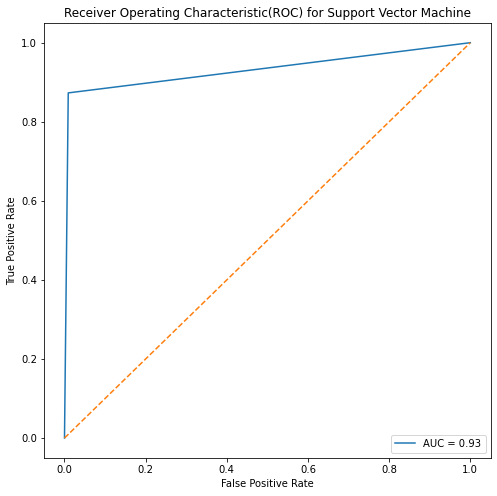

In [176]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## KNN

In [275]:
from sklearn.neighbors import KNeighborsClassifier
#KNN is more sensititve to noise
transformer = RobustScaler().fit(X)
X_scaled=transformer.transform(X)
X_train_scaled, X_test_scaled, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=random)
#scaling didn't help*****************************
knn=KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9221105527638191
0.9590643274853801
Training ROC_AUC:  0.9067545349181962
Test ROC_AUC:  0.9477513227513227


### Tuning

In [267]:
param_grid= {'n_neighbors': np.arange(1,40),
            'p':[1,2]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(knn, param_grid, cv=cv, scoring='roc_auc')
grid_search.fit(X_train_scaled, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

KNeighborsClassifier(n_neighbors=21, p=1)


0.9708566137566137

In [268]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
40,0.004509,0.000823,0.005704,0.001102,21,1,"{'n_neighbors': 21, 'p': 1}",0.978667,0.996000,0.992000,...,0.965333,0.977333,0.980000,0.993333,0.996000,0.868571,0.972222,0.970857,0.030315,1
38,0.004611,0.000834,0.005780,0.000721,20,1,"{'n_neighbors': 20, 'p': 1}",0.978667,0.993333,0.989333,...,0.941333,0.976000,0.985333,0.997333,0.997333,0.868571,0.972222,0.970729,0.030571,2
36,0.005517,0.001772,0.006920,0.001389,19,1,"{'n_neighbors': 19, 'p': 1}",0.978667,0.994667,0.993333,...,0.941333,0.977333,0.986667,0.992000,0.997333,0.874286,0.972222,0.970589,0.030254,3
42,0.004711,0.000786,0.005959,0.000877,22,1,"{'n_neighbors': 22, 'p': 1}",0.978667,0.996000,0.992000,...,0.961333,0.974667,0.977333,0.993333,0.994667,0.868571,0.972222,0.970053,0.030255,4
46,0.004493,0.001027,0.005891,0.001018,24,1,"{'n_neighbors': 24, 'p': 1}",0.974667,0.997333,0.993333,...,0.958667,0.973333,0.976000,0.993333,0.994667,0.862857,0.986111,0.969385,0.031476,5
44,0.005525,0.000885,0.007223,0.001245,23,1,"{'n_neighbors': 23, 'p': 1}",0.974667,0.994667,0.990667,...,0.960000,0.973333,0.977333,0.990667,0.994667,0.868571,0.972222,0.969299,0.030338,6
48,0.008352,0.001346,0.010465,0.001371,25,1,"{'n_neighbors': 25, 'p': 1}",0.969333,0.997333,0.992000,...,0.958667,0.973333,0.973333,0.994667,0.994667,0.862857,0.986111,0.968854,0.031651,7
50,0.004819,0.001378,0.006120,0.001059,26,1,"{'n_neighbors': 26, 'p': 1}",0.968000,0.998667,0.993333,...,0.958667,0.969333,0.972000,0.994667,0.994667,0.861429,0.986111,0.968135,0.032153,8
56,0.005380,0.001167,0.006837,0.001260,29,1,"{'n_neighbors': 29, 'p': 1}",0.970667,1.000000,0.990667,...,0.952000,0.969333,0.970667,0.993333,0.994667,0.858571,0.986111,0.967857,0.032761,9
32,0.005703,0.001032,0.007045,0.001280,17,1,"{'n_neighbors': 17, 'p': 1}",0.981333,0.994667,0.993333,...,0.941333,0.981333,0.985333,0.989333,0.997333,0.880000,0.972222,0.967585,0.032415,10


##### Tuned Model

In [276]:
knn=KNeighborsClassifier(n_neighbors=21, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9590643274853801
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9477513227513227


In [277]:
knn=KNeighborsClassifier(n_neighbors=17, p=1)
knn.fit(X_train_scaled, y_train)
y_train_pred=knn.predict(X_train_scaled)
y_test_pred=knn.predict(X_test_scaled)
print(knn.score(X_train_scaled, y_train))
print(knn.score(X_test_scaled, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.914572864321608
0.9649122807017544
Training ROC_AUC:  0.895339748254764
Test ROC_AUC:  0.9523809523809523


Text(0.5, 0, 'False Positive Rate')

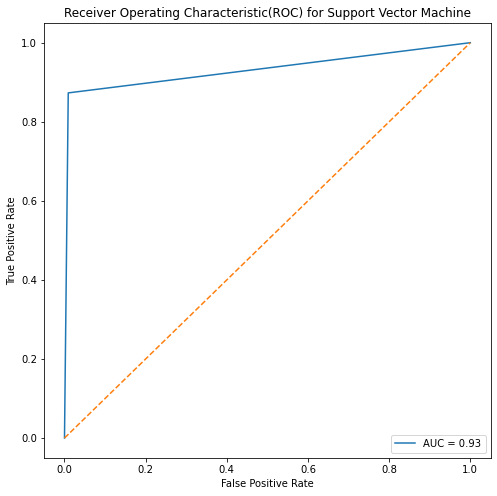

In [188]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_test_pred)
auc_sc = auc(fpr, tpr)
# Draw ROC curve:
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label="AUC = %0.2f"%auc_sc)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.legend(loc='lower right')
plt.title("Receiver Operating Characteristic(ROC) for Support Vector Machine")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")

## SVM

In [189]:
#SVM
from sklearn.svm import SVC
clf = SVC()
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8994974874371859
0.935672514619883
Training ROC_AUC:  0.8698148297889544
Test ROC_AUC:  0.9126984126984127


In [226]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### Tuning

In [190]:
param_grid= {'kernel' : ['poly', 'rbf', 'sigmoid'],
             'C' : [50, 10, 1.0, 0.1, 0.01],
             'gamma' : ['scale']}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SVC(C=50)


0.9711306878306877

In [191]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.004133,0.000427,0.002601,0.000611,50,scale,rbf,"{'C': 50, 'gamma': 'scale', 'kernel': 'rbf'}",0.930667,1.000000,...,0.962667,0.989333,0.978667,1.000000,0.981333,0.960000,0.988889,0.971131,0.022762,1
0,0.005115,0.001461,0.002822,0.000840,50,scale,poly,"{'C': 50, 'gamma': 'scale', 'kernel': 'poly'}",0.957333,0.997333,...,0.960000,0.960000,0.978667,1.000000,0.989333,0.920000,0.988889,0.969771,0.022592,2
4,0.004385,0.001179,0.003201,0.000600,10,scale,rbf,"{'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}",0.938667,0.997333,...,0.962667,0.984000,0.976000,1.000000,0.981333,0.945714,0.988889,0.969041,0.023894,3
3,0.003738,0.000616,0.002496,0.000483,10,scale,poly,"{'C': 10, 'gamma': 'scale', 'kernel': 'poly'}",0.954667,0.997333,...,0.957333,0.960000,0.976000,1.000000,0.986667,0.920000,0.988889,0.966735,0.024535,4
7,0.005591,0.000975,0.003846,0.001185,1,scale,rbf,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.946667,0.997333,...,0.962667,0.954667,0.960000,0.989333,0.994667,0.874286,0.983333,0.963899,0.027788,5
6,0.005104,0.000982,0.004083,0.000796,1,scale,poly,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'poly'}",0.938667,0.997333,...,0.957333,0.946667,0.954667,0.986667,0.994667,0.837143,0.983333,0.958171,0.034083,6
10,0.006300,0.001159,0.003882,0.000947,0.1,scale,rbf,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'rbf'}",0.933333,1.000000,...,0.949333,0.941333,0.952000,0.978667,0.994667,0.828571,0.983333,0.955643,0.035772,7
13,0.006730,0.001153,0.003046,0.000710,0.01,scale,rbf,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'rbf'}",0.933333,1.000000,...,0.946667,0.938667,0.952000,0.976000,0.994667,0.808571,0.983333,0.953355,0.038713,8
9,0.004804,0.001082,0.003416,0.000702,0.1,scale,poly,"{'C': 0.1, 'gamma': 'scale', 'kernel': 'poly'}",0.933333,1.000000,...,0.946667,0.936000,0.952000,0.976000,0.994667,0.805714,0.983333,0.952723,0.039269,9
12,0.004647,0.000820,0.003242,0.000881,0.01,scale,poly,"{'C': 0.01, 'gamma': 'scale', 'kernel': 'poly'}",0.922667,1.000000,...,0.944000,0.936000,0.949333,0.973333,0.994667,0.805714,0.980556,0.951024,0.039341,10


##### Tuned Model

In [192]:
clf = SVC(C=50, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9120603015075377
0.9415204678362573
Training ROC_AUC:  0.8919840435567774
Test ROC_AUC:  0.923941798941799


In [193]:
clf = SVC(C=10, kernel='poly')
clf = clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))
print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9095477386934674
0.9415204678362573
Training ROC_AUC:  0.8872806662893185
Test ROC_AUC:  0.923941798941799


## PLS Regression

In [196]:
X_train_full, X_test_full, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder(handle_unknown = 'ignore',sparse=False)
trainy_p = enc.fit_transform(y_train.to_numpy().reshape(-1,1))
testy_p = enc.transform(y_test.to_numpy().reshape(-1,1))

pls=PLSRegression(n_components=8)
pls.fit(X_train_full, trainy_p)
y_train_pred=pls.predict(X_train_full)
#print(y_train_pred)
y_test_pred=pls.predict(X_test_full)
print(pls.score(X_train_full, trainy_p))
print(pls.score(X_test_full, testy_p))

0.7663739411866044
0.7428791076062854


## Decision trees

In [243]:
# Decision trees
from sklearn import tree
clf=tree.DecisionTreeClassifier(random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9415204678362573
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9437830687830688


### Tuning

In [202]:
maxDepth=clf.tree_.max_depth
param_grid = {'max_depth':range(1, maxDepth+1),
              'max_features':[0.2,0.4,0.6,0.8], 
              'max_leaf_nodes':[20,30,40,50],
             'min_samples_leaf': [1,2,5,10]}
clf = tree.DecisionTreeClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)
grid_search.best_score_

{'max_depth': 5, 'max_features': 0.6, 'max_leaf_nodes': 30, 'min_samples_leaf': 10}


0.971510582010582

In [203]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_leaf_nodes,param_min_samples_leaf,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
295,0.006899,0.001492,0.004768,0.000760,5,0.6,30,10,"{'max_depth': 5, 'max_features': 0.6, 'max_lea...",1.000000,...,0.958667,0.994667,0.925333,0.956000,0.996000,0.931429,0.972222,0.971511,0.024568,1
403,0.005000,0.001033,0.003940,0.000773,7,0.4,20,10,"{'max_depth': 7, 'max_features': 0.4, 'max_lea...",0.968000,...,0.945333,0.996000,0.928000,0.957333,0.996000,0.924286,0.991667,0.970207,0.027041,2
359,0.007867,0.001419,0.005389,0.001566,6,0.6,30,10,"{'max_depth': 6, 'max_features': 0.6, 'max_lea...",0.998667,...,0.958667,0.956000,0.926667,0.949333,0.985333,0.965714,0.972222,0.970129,0.027292,3
435,0.009218,0.002564,0.005775,0.001645,7,0.8,20,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.998667,...,0.958667,0.994667,0.934667,0.972000,0.988000,0.931429,0.972222,0.969861,0.026430,4
443,0.005900,0.000538,0.003767,0.000715,7,0.8,40,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.998667,...,0.952000,0.997333,0.934667,0.972000,0.973333,0.931429,0.972222,0.969534,0.026182,5
379,0.006166,0.001003,0.003935,0.000629,6,0.8,40,10,"{'max_depth': 6, 'max_features': 0.8, 'max_lea...",0.993333,...,0.958667,0.926667,0.917333,0.968000,0.972000,0.931429,0.972222,0.969257,0.025510,6
347,0.004767,0.000882,0.003567,0.000559,6,0.4,40,10,"{'max_depth': 6, 'max_features': 0.4, 'max_lea...",0.997333,...,0.960000,0.986667,0.937333,0.977333,0.970667,0.888571,0.991667,0.969234,0.028841,7
439,0.008162,0.001743,0.005141,0.001288,7,0.8,30,10,"{'max_depth': 7, 'max_features': 0.8, 'max_lea...",0.996000,...,0.958667,0.992000,0.932000,0.949333,0.972000,0.934286,0.972222,0.969151,0.024417,8
223,0.004567,0.000803,0.003534,0.000499,4,0.4,50,10,"{'max_depth': 4, 'max_features': 0.4, 'max_lea...",0.998667,...,0.958667,0.988000,0.949333,0.945333,0.973333,0.932857,0.994444,0.968895,0.025173,9
311,0.008231,0.001251,0.006334,0.001716,5,0.8,30,10,"{'max_depth': 5, 'max_features': 0.8, 'max_lea...",0.992000,...,0.958667,0.994667,0.940000,0.972000,0.973333,0.931429,0.972222,0.968378,0.024649,10


##### Tuned Model

In [204]:
clf=tree.DecisionTreeClassifier(max_depth= 5, max_features= 0.6, max_leaf_nodes= 30, min_samples_leaf= 10)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.957286432160804
0.9239766081871345
Training ROC_AUC:  0.9618204361068435
Test ROC_AUC:  0.92989417989418


## Random Forest

In [272]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9707602339181286
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9636243386243386


### Tuning

In [210]:
param_grid = {'max_depth':np.arange(4, 10),
              'max_features':[0.2,0.4,0.6,0.8],
              'n_estimators': [10,50,100,200,300,500,1000]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf_rf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

RandomForestClassifier(max_depth=5, max_features=0.2, n_estimators=500,
                       random_state=42)


0.9900042328042329

In [211]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
33,1.312786,0.227621,0.070593,0.032490,5,0.2,500,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.978667,1.0,0.970667,0.997333,1.000000,0.971429,0.997222,0.990004,0.014700,1
61,1.262206,0.146398,0.058304,0.010215,6,0.2,500,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.970667,1.0,0.973333,0.997333,1.000000,0.974286,0.997222,0.989918,0.015126,2
60,0.762686,0.117137,0.038471,0.011075,6,0.2,300,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.965333,1.0,0.970667,0.997333,1.000000,0.971429,0.997222,0.989823,0.014918,3
59,0.486717,0.040010,0.025702,0.003454,6,0.2,200,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.965333,1.0,0.973333,0.997333,1.000000,0.971429,0.997222,0.989823,0.014661,4
34,2.616926,0.361488,0.131589,0.053207,5,0.2,1000,"{'max_depth': 5, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.976000,1.0,0.970667,0.997333,1.000000,0.971429,0.997222,0.989819,0.015468,5
62,2.969530,0.503185,0.149111,0.069591,6,0.2,1000,"{'max_depth': 6, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.970667,1.0,0.970667,0.997333,1.000000,0.971429,0.997222,0.989812,0.015248,6
12,1.431041,0.261044,0.059627,0.017437,4,0.4,500,"{'max_depth': 4, 'max_features': 0.4, 'n_estim...",1.0,1.0,...,0.978667,1.0,0.970667,0.997333,0.997333,0.971429,0.986111,0.989733,0.012797,7
143,0.390548,0.023295,0.020742,0.002797,9,0.2,200,"{'max_depth': 9, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.965333,1.0,0.970667,0.997333,1.000000,0.971429,0.997222,0.989638,0.015569,8
115,0.768237,0.137634,0.041464,0.017858,8,0.2,200,"{'max_depth': 8, 'max_features': 0.2, 'n_estim...",1.0,1.0,...,0.965333,1.0,0.970667,0.997333,1.000000,0.971429,0.997222,0.989638,0.015569,8
10,0.676237,0.071767,0.030560,0.005010,4,0.4,200,"{'max_depth': 4, 'max_features': 0.4, 'n_estim...",1.0,1.0,...,0.981333,1.0,0.970667,0.997333,1.000000,0.968571,0.986111,0.989635,0.013460,10


##### Tuned Model

In [273]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=5, max_features=0.2, n_estimators=500,random_state=42)
clf_rf.fit(X_train_full, y_train)
y_train_pred=clf_rf.predict(X_train_full)
y_test_pred=clf_rf.predict(X_test_full)
print(clf_rf.score(X_train_full, y_train))
print(clf_rf.score(X_test_full, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.992462311557789
0.9649122807017544
Training ROC_AUC:  0.9899328859060403
Test ROC_AUC:  0.958994708994709


In [274]:
#Random Forest
clf_rf = RandomForestClassifier(max_depth=9, max_features=0.2, n_estimators=200,random_state=42)
clf_rf.fit(X_train, y_train)
y_train_pred=clf_rf.predict(X_train)
y_test_pred=clf_rf.predict(X_test)
print(clf_rf.score(X_train, y_train))
print(clf_rf.score(X_test, y_test))


print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.958994708994709


## Stochastic Gradient D

In [239]:
#SGD
from sklearn.linear_model import SGDClassifier
clf = SGDClassifier(max_iter=5000, random_state=random)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.9095477386934674
0.9473684210526315
Training ROC_AUC:  0.8859329937198458
Test ROC_AUC:  0.9285714285714286


In [240]:
param_grid = {'loss' : ['hinge', 'log', 'modified_huber', 'squared_hinge', 'perceptron'],
              'penalty' : ['l2', 'l1', 'elasticnet'],
              'random_state':[random]
              }
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

SGDClassifier(max_iter=5000, penalty='l1', random_state=42)


0.9548571428571428

In [241]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_loss,param_penalty,param_random_state,params,split0_test_score,split1_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
1,0.010600,0.006752,0.006768,0.003676,hinge,l1,42,"{'loss': 'hinge', 'penalty': 'l1', 'random_sta...",0.893333,0.954667,...,0.925333,0.933333,0.968000,1.000000,0.970667,0.968571,0.980556,0.954857,0.033854,1
13,0.008700,0.001187,0.004808,0.001093,perceptron,l1,42,"{'loss': 'perceptron', 'penalty': 'l1', 'rando...",0.893333,0.954667,...,0.925333,0.933333,0.968000,1.000000,0.970667,0.968571,0.980556,0.954857,0.033854,1
10,0.008567,0.001023,0.005277,0.001030,squared_hinge,l1,42,"{'loss': 'squared_hinge', 'penalty': 'l1', 'ra...",0.901333,0.960000,...,0.872000,0.893333,0.965333,1.000000,0.970667,0.940000,0.980556,0.953575,0.036139,3
2,0.012101,0.004736,0.005667,0.001247,hinge,elasticnet,42,"{'loss': 'hinge', 'penalty': 'elasticnet', 'ra...",0.920000,0.970667,...,0.890667,0.890667,0.968000,1.000000,0.949333,0.931429,0.980556,0.951952,0.039505,4
14,0.010372,0.003023,0.004737,0.000726,perceptron,elasticnet,42,"{'loss': 'perceptron', 'penalty': 'elasticnet'...",0.920000,0.970667,...,0.890667,0.890667,0.968000,1.000000,0.949333,0.931429,0.980556,0.951952,0.039505,4
7,0.007967,0.000983,0.004968,0.001015,modified_huber,l1,42,"{'loss': 'modified_huber', 'penalty': 'l1', 'r...",0.888000,0.965333,...,0.877333,0.893333,0.965333,0.997333,0.954667,0.962857,0.975000,0.951581,0.035182,6
4,0.010000,0.001342,0.004634,0.000482,log,l1,42,"{'loss': 'log', 'penalty': 'l1', 'random_state...",0.888000,0.965333,...,0.840000,0.893333,0.965333,1.000000,0.954667,0.962857,0.975000,0.950248,0.038313,7
9,0.008467,0.005137,0.005475,0.001820,squared_hinge,l2,42,"{'loss': 'squared_hinge', 'penalty': 'l2', 'ra...",0.901333,0.976000,...,0.949333,0.925333,0.949333,0.997333,0.941333,0.934286,0.980556,0.948050,0.040466,8
0,0.006803,0.001165,0.004831,0.000636,hinge,l2,42,"{'loss': 'hinge', 'penalty': 'l2', 'random_sta...",0.848000,0.925333,...,0.933333,0.922667,0.970667,0.997333,0.976000,0.925714,0.980556,0.947291,0.039450,9
12,0.006133,0.000922,0.004968,0.002483,perceptron,l2,42,"{'loss': 'perceptron', 'penalty': 'l2', 'rando...",0.848000,0.925333,...,0.933333,0.922667,0.970667,0.997333,0.976000,0.925714,0.980556,0.947291,0.039450,9


##### Tuned Model

In [242]:
clf = SGDClassifier(loss='hinge', max_iter=5000, penalty='l1', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8919597989949749
0.9298245614035088
Training ROC_AUC:  0.8867011670844451
Test ROC_AUC:  0.9378306878306879


In [233]:
clf = SGDClassifier(loss='modified_huber', max_iter=100, penalty='l2', random_state=42)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

0.8944723618090452
0.9181286549707602
Training ROC_AUC:  0.8631034203929814
Test ROC_AUC:  0.8888888888888888


## Stochastic Gradient Boosting

In [234]:
from sklearn.ensemble import GradientBoostingClassifier
clf = GradientBoostingClassifier()
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9590643274853801
Training ROC_AUC:  1.0
Test ROC_AUC:  0.9543650793650793


### Tuning

In [235]:
param_grid = {'n_estimators' : [10, 100, 1000],
              'learning_rate' : [0.001, 0.01, 0.1],
              'subsample' : [0.5, 0.7, 1.0],
              'max_depth' : [3, 7, 9]}
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search= GridSearchCV(clf, param_grid, cv=cv , scoring="roc_auc")
grid_search.fit(X_train, y_train)
print(grid_search.best_estimator_)
grid_search.best_score_

GradientBoostingClassifier(n_estimators=1000, subsample=0.5)


0.9901402116402117

In [236]:
results=pd.DataFrame(grid_search.cv_results_)
results.sort_values(by=['rank_test_score'], inplace=True)
results.head(10)
#order by rank test score

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,param_subsample,params,split0_test_score,...,split23_test_score,split24_test_score,split25_test_score,split26_test_score,split27_test_score,split28_test_score,split29_test_score,mean_test_score,std_test_score,rank_test_score
60,2.944878,0.427395,0.006367,0.001760,0.1,3,1000,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.981333,0.994667,0.989333,1.000000,1.0,0.951429,1.000000,0.990140,0.015853,1
51,4.842056,0.274610,0.006442,0.001019,0.01,9,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 9, 'n_est...",1.000000,...,0.976000,1.000000,0.968000,1.000000,1.0,0.974286,0.997222,0.990017,0.014242,2
57,0.341893,0.043794,0.006268,0.001210,0.1,3,100,0.5,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.986667,0.997333,0.970667,1.000000,1.0,0.960000,0.994444,0.990004,0.015486,3
79,12.608765,1.256599,0.012268,0.002220,0.1,9,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",0.997333,...,0.976000,0.989333,0.978667,1.000000,1.0,0.968571,0.997222,0.989834,0.013469,4
42,4.170619,0.401256,0.006070,0.001317,0.01,7,1000,0.5,"{'learning_rate': 0.01, 'max_depth': 7, 'n_est...",1.000000,...,0.978667,1.000000,0.968000,1.000000,1.0,0.960000,0.997222,0.989541,0.014901,5
58,0.354915,0.080674,0.005069,0.001788,0.1,3,100,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.984000,1.000000,0.973333,1.000000,1.0,0.954286,0.997222,0.989461,0.016405,6
61,3.785736,0.440883,0.006334,0.001758,0.1,3,1000,0.7,"{'learning_rate': 0.1, 'max_depth': 3, 'n_esti...",1.000000,...,0.984000,0.994667,0.986667,1.000000,1.0,0.945714,0.997222,0.989424,0.016433,7
66,0.873625,0.165159,0.007402,0.002414,0.1,7,100,0.5,"{'learning_rate': 0.1, 'max_depth': 7, 'n_esti...",1.000000,...,0.978667,0.992000,0.976000,1.000000,1.0,0.960000,0.997222,0.989285,0.015442,8
75,1.008410,0.067137,0.007071,0.001163,0.1,9,100,0.5,"{'learning_rate': 0.1, 'max_depth': 9, 'n_esti...",1.000000,...,0.976000,1.000000,0.976000,1.000000,1.0,0.971429,0.994444,0.989214,0.014449,9
15,4.317540,0.491938,0.005982,0.001044,0.001,7,1000,0.5,"{'learning_rate': 0.001, 'max_depth': 7, 'n_es...",1.000000,...,0.965333,0.997333,0.970667,0.997333,1.0,0.974286,0.988889,0.989210,0.013760,10


##### Tuned Model

In [237]:
clf = GradientBoostingClassifier(n_estimators=1000, learning_rate=0.1, subsample=0.5, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9707602339181286
Training ROC_AUC:  1.0
Test ROC_AUC:  0.966931216931217


In [238]:
clf = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, subsample=0.5, max_depth=3)
clf=clf.fit(X_train, y_train)
y_train_pred=clf.predict(X_train)
y_test_pred=clf.predict(X_test)
print(clf.score(X_train, y_train))
print(clf.score(X_test, y_test))

print("Training ROC_AUC: ", roc_auc_score(y_train, y_train_pred))
print("Test ROC_AUC: ", roc_auc_score(y_test, y_test_pred))

1.0
0.9649122807017544
Training ROC_AUC:  1.0
Test ROC_AUC:  0.958994708994709
